In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

sns.set(font_scale=1.0)
plt.style.use("seaborn-whitegrid")

In [35]:
data1 = pd.read_feather("rerouting15_beta0")
data2 = pd.read_feather("rerouting30_beta1")

input_vars1 = pd.read_csv("input_parameters15_beta0.csv")
input_vars2 = pd.read_csv("input_parameters30_beta1.csv")

data2.o0 = data2.o0+(len(input_vars1))

data = pd.concat([data1,data2]).reset_index()
input_vars = pd.concat([input_vars1,input_vars2]).reset_index()

In [17]:
input_vars[input_vars.ration_size_policy==30]

,index,Unnamed: 0,capacity_policy,minfood_access_policy,ration_size_policy,day_access_policy,rerouting_policy,alpha,beta,gamma,epsilon,parallel_served_full,avg_interactions
320,0,0,0.0,0.0,30.0,0.0,0.0,0.0,1.0,3.0,0.1,6.0,20.0
321,1,1,0.0,0.0,30.0,0.0,1.0,0.0,1.0,3.0,0.1,6.0,20.0
322,2,2,0.0,0.0,30.0,0.0,2.0,0.0,1.0,3.0,0.1,6.0,20.0
323,3,3,0.0,0.0,30.0,0.0,3.0,0.0,1.0,3.0,0.1,6.0,20.0
324,4,4,0.0,0.0,30.0,0.0,0.0,0.0,1.0,3.0,0.1,7.8,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,315,315,0.0,0.0,30.0,0.0,3.0,0.0,1.0,7.0,1.0,6.0,20.0
636,316,316,0.0,0.0,30.0,0.0,0.0,0.0,1.0,7.0,1.0,7.8,20.0
637,317,317,0.0,0.0,30.0,0.0,1.0,0.0,1.0,7.0,1.0,7.8,20.0
638,318,318,0.0,0.0,30.0,0.0,2.0,0.0,1.0,7.0,1.0,7.8,20.0


In [18]:
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm
def ticks_labels(nb_days):
    if 30%nb_days != 0:
        raise ValueError 
    else:
        vec = np.linspace(0,4320,int(30/nb_days)+1)
        labs = list()
        for i in range(int(30/nb_days)+1):
            labs.append("Day %s"%(i*nb_days))
        return vec,labs

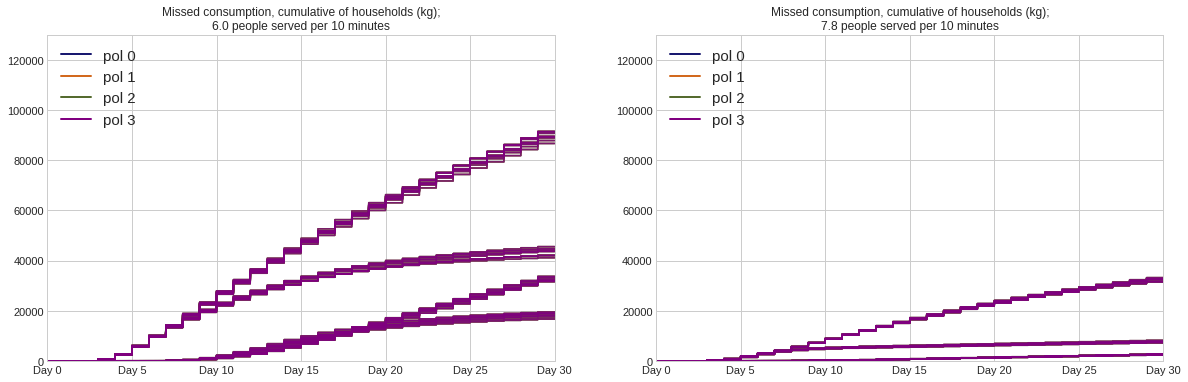

In [39]:
# plt.style.use(['science','grid'])
input_vars = input_vars[input_vars.ration_size_policy==30]
# dict to store relevant indices
d = {}
d[0] = input_vars[input_vars.rerouting_policy==0].index
d[1] = input_vars[input_vars.rerouting_policy==1].index
d[2] = input_vars[input_vars.rerouting_policy==2].index
d[3] = input_vars[input_vars.rerouting_policy==3].index


fig, ax = plt.subplots(1,2,figsize=(20,6))
           
# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['midnightblue', 'chocolate', 'darkolivegreen','purple']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['pol 0', 'pol 1', 'pol 2', 'pol 3']

for i in d:    
    for j in d[i]:
        if input_vars.parallel_served_full[j] == 6.0:
            ax[0].plot( x, data.o1[data.o0==j],color=colors[i], alpha=.75)
            ax[0].set_title("Missed consumption, cumulative of households (kg);\n6.0 people served per 10 minutes")
        else:
            ax[1].plot( x, data.o1[data.o0==j],color=colors[i], alpha=.75)
            ax[1].set_title("Missed consumption, cumulative of households (kg);\n7.8 people served per 10 minutes")
      
for a in ax:
    a.set_xticks(ticks_labels(5)[0])
    a.set_xticklabels(ticks_labels(5)[1])
    a.set_xlim([0,4320])
    a.set_ylim([-200,130e3])
    a.legend(lines, labels,loc='upper left',fontsize=15)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

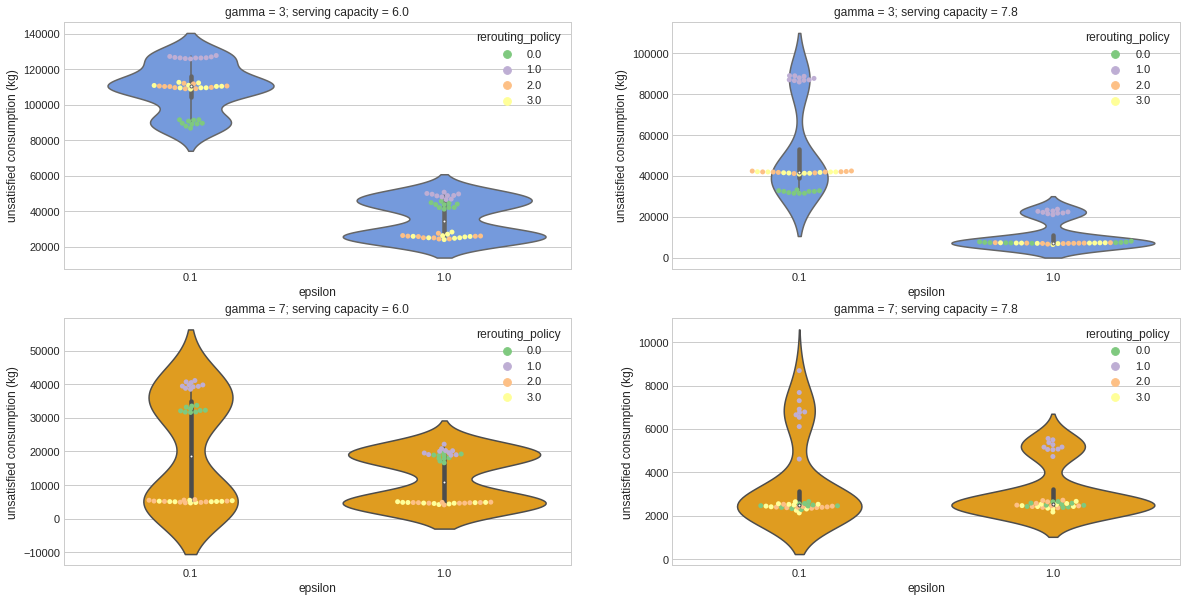

In [61]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
uc_endvals_dict = {}
uc_endvals_dict["unsatisfied consumption"] = list()

for j in input_vars.index:
    uc_endvals_dict["unsatisfied consumption"].append(data.o1[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars.reset_index(),uc_endvals_df],axis=1)

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']
my_palette['reds'] = []

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):    
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==scs[s]]
    for g in range(len(gammas)):
        tmp2 = tmp1[tmp1.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="epsilon", y="unsatisfied consumption", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="epsilon", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][g])
        ax[g,s].set_title("gamma = %s; serving capacity = %s"%(gammas[g],scs[s]))
        ax[g,s].set_ylabel("unsatisfied consumption (kg)")

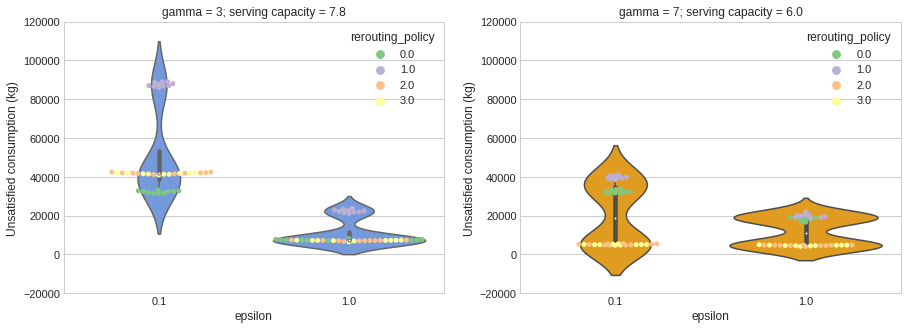

In [66]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

gs = [  [3 , 7.8] ,[7 , 6.0] ]

t={}
t[3]=0
t[7]=1
for i in range(len(gs)):
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="epsilon", y="unsatisfied consumption", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="epsilon", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([-20e3,120e3])
    ax[i].set_title("gamma = %s; serving capacity = %s"%(gs[i][0],gs[i][1]))
    ax[i].set_ylabel("Unsatisfied consumption (kg)");

In [ ]:
## Food waste

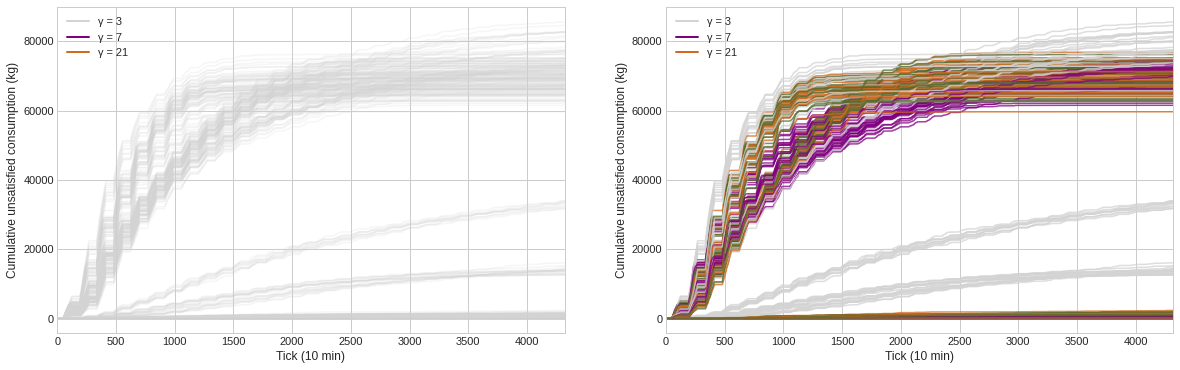

In [56]:
# dict to store relevant indices
d = {}
d[0] = input_vars[input_vars.gamma==3].index
d[1] = input_vars[input_vars.gamma==7].index
d[2] = input_vars[input_vars.gamma==14].index

fig, ax = plt.subplots(1,2,figsize=(20,6))
           
# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['lightgrey','purple', 'chocolate', 'darkolivegreen']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 7', 'γ = 21']

# Zoom for 2nd graph
# ax[1].set_ylim([-100,30000])
# ax[0].set_ylim([-100,100000])

# graph layout
# plt.title("")

for i in d:    
    for j in d[i]:
        if input_vars.ration_size_policy[j] == 30:
            ax[0].plot( x, data.o2[data.o0==j],color='lightgrey', alpha=0.2)
            ax[1].plot( x, data.o2[data.o0==j],color=colors[int(input_vars.rerouting_policy[j])], alpha=.75)
            
        else:
            ax[0].plot( x, data.o2[data.o0==j],color=colors[int(input_vars.rerouting_policy[j])], alpha=.75)
            ax[1].plot( x, data.o2[data.o0==j],color='lightgrey', alpha=.75)
        
for a in ax:
    a.set_ylabel("Cumulative unsatisfied consumption (kg)")
    a.set_xlabel("Tick (10 min)")
    a.set_xlim([0,4320])
    a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

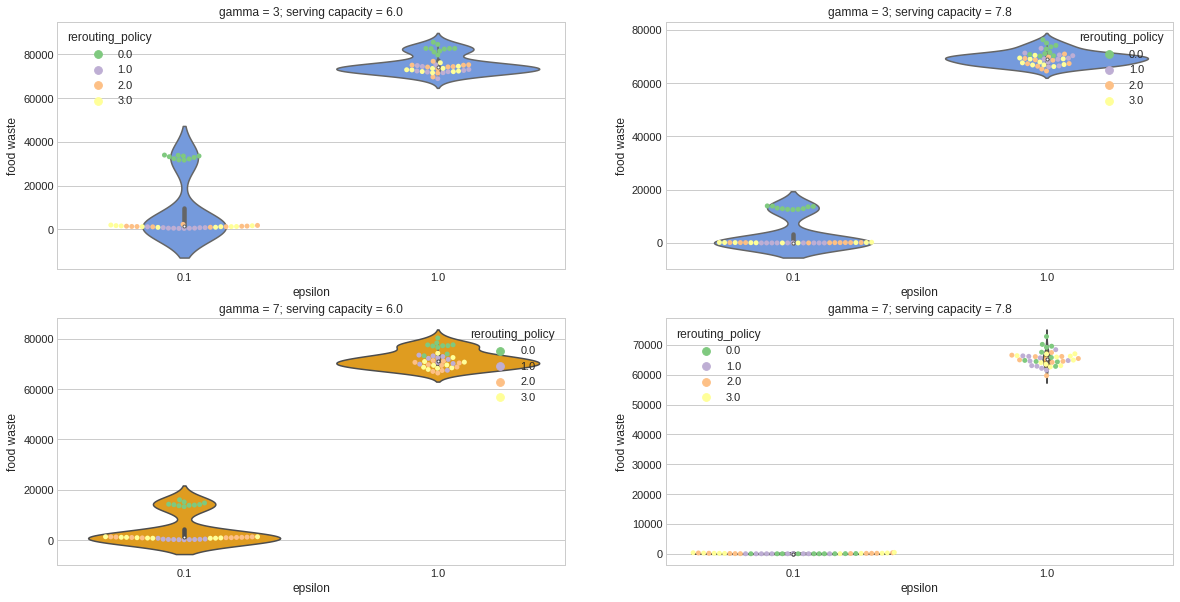

In [68]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
plt.style.use("seaborn-whitegrid")
uc_endvals_dict = {}
uc_endvals_dict["food waste"] = list()
# filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()
for j in input_vars.index:
    uc_endvals_dict["food waste"].append(data.o2[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars.reset_index(),uc_endvals_df],axis=1)

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']
my_palette['reds'] = []

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp1[tmp1.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="epsilon", y="food waste", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="epsilon", y="food waste", data=tmp2,color=my_palette['light'][g])
        
        ax[g,s].set_title("gamma = %s; serving capacity = %s"%(gammas[g],scs[s]))

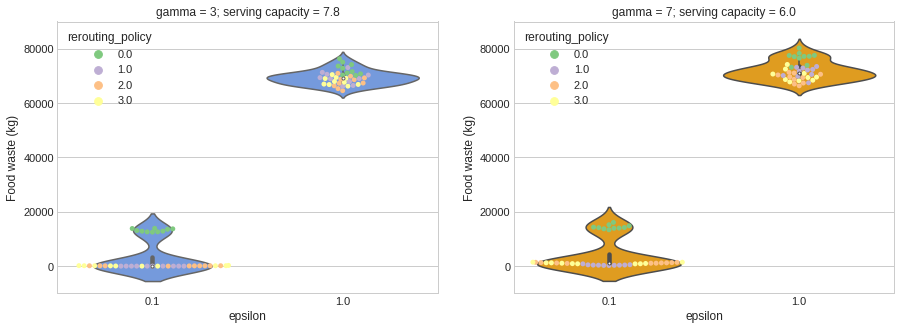

In [70]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

gs = [  [3 , 7.8] ,[7 , 6.0] ]

t={}
t[3]=0
t[7]=1
for i in range(len(gs)):
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="epsilon", y="food waste", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="epsilon", y="food waste", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_title("gamma = %s; serving capacity = %s"%(gs[i][0],gs[i][1]))
    ax[i].set_ylim([-10e3,90e3])
    ax[i].set_ylabel("Food waste (kg)");

## Queuing

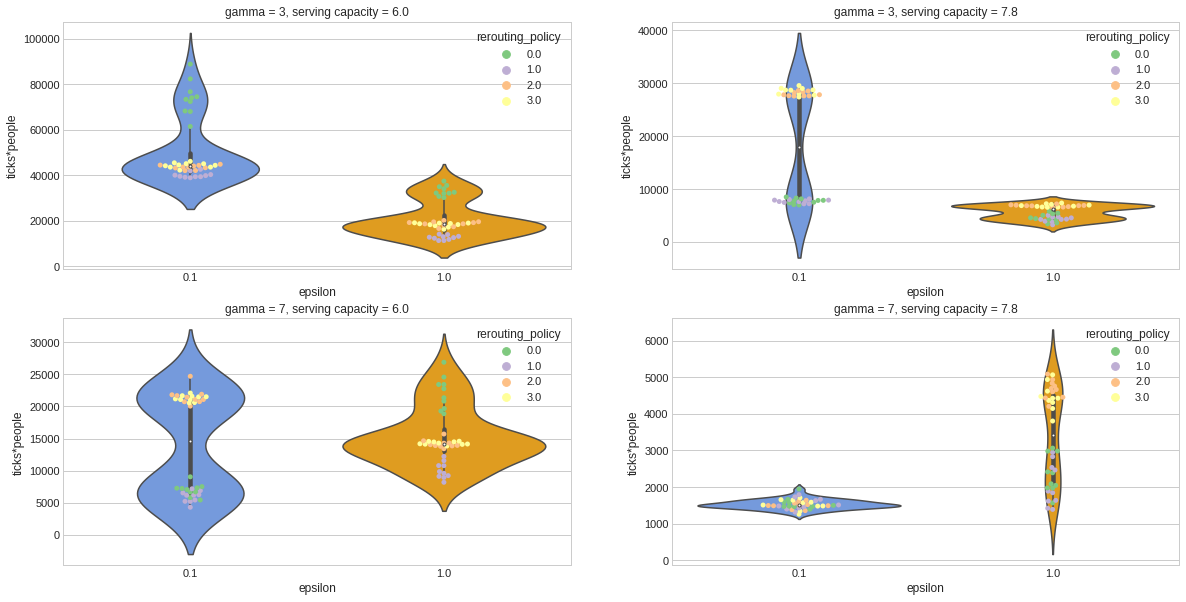

In [72]:
plt.style.use("seaborn-whitegrid")

fig, ax = plt.subplots(2,2,figsize=(20,10))


uc_endvals_dict = {}
uc_endvals_dict["ticks*people"] = list()

for j in input_vars.index:
    uc_endvals_dict["ticks*people"].append( np.sum(data[data.o0==j].iloc[:,9]))

uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars.reset_index(),uc_endvals_df],axis=1)


my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp = input_vars_filtered[input_vars_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="epsilon", y="ticks*people", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="epsilon", y="ticks*people", data=tmp2,palette=my_palette['light'])
        
        ax[g,s].set_title('gamma = %s, serving capacity = %s'%(gammas[g],scs[s]))

In [73]:
q_sum = list()
n_facs = 12
for j in input_vars.index:
#     uc_endvals_dict["u_con (norm)"].append(data_batch2.o2[data_batch2.o0==j].iloc[-1])
    tmp_sum = 0
    for i in range(n_facs):
        tmp_sum += ( np.sum(data[data.o0==j].iloc[:,i+4]))  
    
    q_sum.append(tmp_sum)    

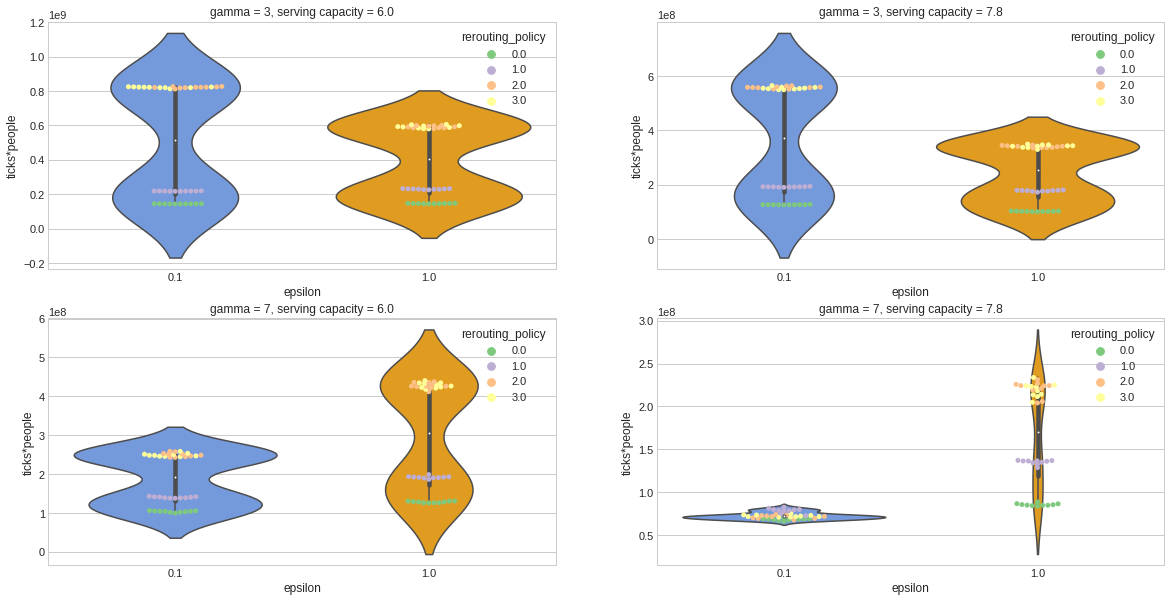

In [75]:
plt.style.use("seaborn-whitegrid")

fig, ax = plt.subplots(2,2,figsize=(20,10))


uc_endvals_dict = {}
uc_endvals_dict["ticks*people"] = list()
# filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()
for j in range(len(input_vars)):
#     uc_endvals_dict["u_con (norm)"].append(data_batch1.o2[data_batch1.o0==j].iloc[-1])
#     uc_endvals_dict["u_con (norm)"].append( np.sum(data_batch1[data_batch1.o0==j].iloc[:,9]))
    
    uc_endvals_dict["ticks*people"].append( q_sum[j] )

uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars.reset_index(),uc_endvals_df],axis=1)


my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp = input_vars_filtered[input_vars_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="epsilon", y="ticks*people", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="epsilon", y="ticks*people", data=tmp2,palette=my_palette['light'])
        
        ax[g,s].set_title('gamma = %s, serving capacity = %s'%(gammas[g],scs[s]))